In [14]:
import numpy as np
import random
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D , MaxPooling2D, Dense, Flatten

# Load Dataset

In [2]:
x_train = np.loadtxt('input.csv', delimiter = ',')
y_train = np.loadtxt('labels.csv', delimiter = ',')

x_test = np.loadtxt('input_test.csv', delimiter = ',')
y_test = np.loadtxt('labels_test.csv', delimiter = ',')

In [12]:
x_train = x_train.reshape(len(x_train),100, 100, 3)
y_train = y_train.reshape(len(y_train),1)

x_test = x_test.reshape(len(x_test),100, 100, 3)
y_test = y_test.reshape(len(y_test),1)

x_train = x_train/255.0
x_test = x_test/255.0

In [8]:
print("Shape of x_train: ", x_train.shape)
print("Shape of y_train: ", y_train.shape)
print("Shape of x_test: ", x_test.shape)
print("Shape of y_test: ", y_test.shape)

Shape of x_train:  (2000, 100, 100, 3)
Shape of y_train:  (2000, 1)
Shape of x_test:  (400, 100, 100, 3)
Shape of y_test:  (400, 1)


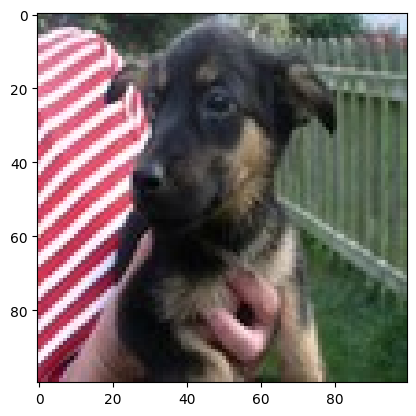

In [19]:
idx = random.randint(0, len(x_train))
plt.imshow(x_train[idx, :])
plt.show()

# Model

In [21]:
model = Sequential([
    Conv2D(32, (3,3), activation = 'relu', input_shape = (100,100,3)),
    MaxPooling2D((2,2)),
    
    Conv2D(32, (3,3), activation = 'relu'),
    MaxPooling2D((2,2)),
    
    Flatten(),
    Dense(64, activation = 'relu'),
    Dense(1, activation = 'sigmoid')
])

In [23]:
model = Sequential()

model.add(Conv2D(32, (3,3), activation = 'relu', input_shape = (100,100,3)))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(32, (3,3), activation = 'relu'))
model.add(MaxPooling2D((2,2)))
          
model.add(Flatten())
model.add(Dense(64, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

In [24]:
model.compile(loss = 'binary_crossentropy' ,optimizer = 'adam', metrics = ['accuracy'])

In [26]:
model.fit(x_train, y_train, epochs = 5, batch_size = 64)

Epoch 1/5
32/32 [==============================] - 3s 95ms/step - loss: 0.3949 - accuracy: 0.8200
Epoch 2/5
32/32 [==============================] - 3s 95ms/step - loss: 0.3163 - accuracy: 0.8640
Epoch 3/5
32/32 [==============================] - 3s 94ms/step - loss: 0.2443 - accuracy: 0.8995
Epoch 4/5
32/32 [==============================] - 3s 94ms/step - loss: 0.1631 - accuracy: 0.9415
Epoch 5/5
32/32 [==============================] - 3s 95ms/step - loss: 0.1173 - accuracy: 0.9645


In [27]:
model.evaluate(x_test, y_test)

13/13 [==============================] - 0s 14ms/step - loss: 1.0825 - accuracy: 0.6425


[1.0825392007827759, 0.6424999833106995]

# Making Predictions

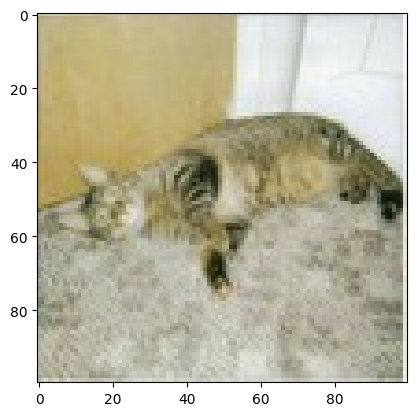

1/1 [==============================] - 0s 11ms/step
Our model says it is a :  cat


In [34]:
idx2 = random.randint(0, len(y_test))
plt.imshow(x_test[idx2, :])
plt.show()

y_pred = model.predict(x_test[idx2, :].reshape(1,100,100,3))
y_pred = y_pred > 0.5
if(y_pred == 0):
    pred = 'dog'
else :
    pred = 'cat'
    
print("Our model says it is a : ", pred)